Individual Assignment: Yash Srivastav 
PGID: 12010060



References:
https://towardsdatascience.com/topic-modeling-with-nlp-on-amazon-reviews-an-application-of-latent-dirichlet-allocation-lda-ae42a4c8b369
https://www.analyticsvidhya.com/blog/2018/10/mining-online-reviews-topic-modeling-lda/
Topic Modelling with LSA and LDA | Kaggle
https://github.com/MaartenGr/KeyBERT
https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea
https://www.analyticsvidhya.com/blog/2021/06/sentiment-analysis-using-nltk-a-practical-approach/
https://www.analyticsvidhya.com/blog/2021/06/vader-for-sentiment-analysis/#:~:text=VADER%20is%20a%20lexicon%20and,the%20other%20positive%20or%20negative


In [199]:
#import selenium
#from selenium import webdriver as wd
import pandas as pd
#import time
#from sklearn.feature_extraction.text import CountVectorizer
#from sentence_transformers import SentenceTransformer
#from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import itertools
from keybert import KeyBERT

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import textblob   
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [8]:
!pip install textblob

In [2]:
from nltk import FreqDist

#Data Collection--------------------------------------------------------------------------------------------------------------

The following list of movies is based on global Box Office revenue. The following set of mix of extremely high and worst grossing movies for the past 2 decades.

In [3]:
#Creating a list of 20 movies
MovieURLs = ['https://www.imdb.com/title/tt4154796/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt0499549/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt0120338/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt2488496/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt4154756/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt0369610/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt6105098/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt2820852/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt2294629/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt3606756/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt0473310/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt5970844/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt4123430/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt0180052/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt2404233/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt0947810/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt1098327/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt0816462/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt0300556/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0',
'https://www.imdb.com/title/tt1213644/reviews?spoiler=hide&sort=reviewVolume&dir=desc&ratingFilter=0'
]

In [4]:
#Initiating chrome driver
driver  = wd.Chrome('chromedriver.exe')

In [ ]:
Temp = []
for i in MovieURLs: #Looping throug the URLs
    driver.get(i)
    try:
        driver.find_element_by_class_name('ipl-load-more__button').click() #Pagination-1
        time.sleep(2.4)
    except:
        pass
    try:
        driver.find_element_by_class_name('ipl-load-more__button').click() #Pagination-2
        time.sleep(2.4)
    except:
        pass
    a = driver.find_element_by_class_name('subpage_title_block__right-column')
    Movie_Title = a.find_element_by_tag_name('h3').text
    b = driver.find_elements_by_class_name('imdb-user-review')
    Rating = []
    Review = []
    Review_Title = []
    for i in b:
        try:
            c = i.find_element_by_class_name(u'rating-other-user-rating').text
            Rating.append(c)
        except:
            c = 'No rating'
            Rating.append(c) 
        try:
            d = i.find_element_by_class_name(u'title').text
            Review_Title.append(d)
        except:
            d = 'No Title'
            Review_Title.append(d)
        try:
            e = i.find_element_by_class_name(u'text').text
            Review.append(e.strip())
        except:
            e = 'No review'
            Review.append(e)
        
            
    tempj = {'Movie_Title':Movie_Title, 'Rating':Rating, 'Review_Title':Review_Title, 'Reviews':Review}
    Temp.append(tempj)
final_df = pd.DataFrame(Temp)

In [5]:
final_df.head()

,Movie_Title,Rating,Review_Title,Reviews
0,Avengers: Endgame (2019),"[No rating, 10/10, 7/10, No rating, 6/10, 8/10...","[Plot holes and other blockbuster weaknesses, ...","[Much like I did for Infinity War, I was caugh..."
1,Avatar (2009),"[9/10, 6/10, No rating, 7/10, 8/10, 9/10, No r...",[Gorgeous and 100% otherworldly--but the story...,"[As of today, there are 2675 reviews for ""Avat..."
2,Titanic (1997),"[9/10, 8/10, 10/10, No rating, 5/10, 9/10, 9/1...",[My review is this film's 2400th....so what mo...,"[""Titanic"" won a bazillion Oscars and is consi..."
3,Star Wars: Episode VII - The Force Awakens (2015),"[10/10, 9/10, No rating, 5/10, 8/10, 7/10, No ...",[A slightly more adult Star Wars that shows Lu...,[I have never been a huge fan of the Star Wars...
4,Avengers: Infinity War (2018),"[9/10, 9/10, No rating, 9/10, No rating, 10/10...","[Extravagant clash of the titans, The Marvel p...",[Have found myself liking or loving a lot of M...


In [50]:
len(final_df)

20

In [6]:
final_df2 = final_df[['Movie_Title', 'Rating']]
final_df2 = final_df2.explode('Rating')
final_df2.head()

,Movie_Title,Rating
0,Avengers: Endgame (2019),No rating
0,Avengers: Endgame (2019),10/10
0,Avengers: Endgame (2019),7/10
0,Avengers: Endgame (2019),No rating
0,Avengers: Endgame (2019),6/10


In [7]:
final_df3 = final_df[['Review_Title']]
final_df3 = final_df3.explode('Review_Title')
final_df3.head()

,Review_Title
0,"Plot holes and other blockbuster weaknesses, b..."
0,Time to play the (end)game
0,Forget Captain Marvel... meet The Rat!
0,"A continuation of ""Infinity War"", Thanos has t..."
0,"Visually great, but not an overly thrilling or..."


In [8]:
final_df4 = final_df[['Reviews']]
final_df4 = final_df4.explode('Reviews')
final_df4.head()

,Reviews
0,"Much like I did for Infinity War, I was caught..."
0,I usually do not watch movies twice in such a ...
0,"After 'the vanishing' in Infinity War, there w..."
0,My wife and I watched this movie at home on DV...
0,"Well, I finally got around to watching ""Avenge..."


In [9]:
frames = [final_df2, final_df3, final_df4]
df_final = pd.concat(frames, axis=1)

In [10]:
df_final.head()

,Movie_Title,Rating,Review_Title,Reviews
0,Avengers: Endgame (2019),No rating,"Plot holes and other blockbuster weaknesses, b...","Much like I did for Infinity War, I was caught..."
0,Avengers: Endgame (2019),10/10,Time to play the (end)game,I usually do not watch movies twice in such a ...
0,Avengers: Endgame (2019),7/10,Forget Captain Marvel... meet The Rat!,"After 'the vanishing' in Infinity War, there w..."
0,Avengers: Endgame (2019),No rating,"A continuation of ""Infinity War"", Thanos has t...",My wife and I watched this movie at home on DV...
0,Avengers: Endgame (2019),6/10,"Visually great, but not an overly thrilling or...","Well, I finally got around to watching ""Avenge..."


In [51]:
len(df_final)

1412

In [11]:
df_final.to_excel("IMDB_reviewsBox.xlsx")

#KEYWORD analysis--------------------------------------------------------------------------------------------------------------

In [12]:
#Manipulating the dataset
Movies_df = df_final.groupby('Movie_Title')['Reviews'].apply(' '.join).reset_index()

In [13]:
Movies_df.head()

,Movie_Title,Reviews
0,Avatar (2009),"As of today, there are 2675 reviews for ""Avata..."
1,Avengers: Endgame (2019),"Much like I did for Infinity War, I was caught..."
2,Avengers: Infinity War (2018),Have found myself liking or loving a lot of Ma...
3,Conan the Barbarian (2011),"I enjoyed the 1982 Conan the Barbarian, and we..."
4,Disaster Movie (2008),"Disaster Movie gets my vote as the ""new"" worst..."


In [15]:
Keys = {'Movie':[], 'Ngrams':[], 'Low_diversity':[], 'High_diversity':[]}
n_gram_range = [(a,b) for a in np.arange(1,3) for b in np.arange(1,3)]
for i in range(20):
    doc = Movies_df.loc[i,['Reviews']][0]
    model = KeyBERT()
    keys = model.extract_keywords(doc)
    for x in range(len(n_gram_range)):
        low = model.extract_keywords(doc,keyphrase_ngram_range=n_gram_range[x], stop_words='english',use_mmr=True,diversity=0.25)
        high = model.extract_keywords(doc,keyphrase_ngram_range=n_gram_range[x], stop_words='english',use_mmr=True,diversity=0.75)
        Keys["Movie"].append(Movies_df.loc[i,['Movie_Title']][0])
        Keys["Ngrams"].append(n_gram_range[x])
        Keys["Low_diversity"].append(low)
        Keys["High_diversity"].append(high)

In [16]:
Keys_Dataframe2 = pd.DataFrame(Keys)

In [17]:
Keys_Dataframe2

,Movie,Ngrams,Low_diversity,High_diversity
0,Avatar (2009),"(1, 1)","[(blockbuster, 0.4033), (avatar, 0.3443), (jur...","[(blockbuster, 0.4033), (element, -0.0719), (a..."
1,Avatar (2009),"(1, 2)","[(reviews avatar, 0.5623), (jurassic park, 0.4...","[(reviews avatar, 0.5623), (create facsimiles,..."
2,Avatar (2009),"(2, 1)",[],[]
3,Avatar (2009),"(2, 2)","[(reviews avatar, 0.5623), (jurassic park, 0.4...","[(reviews avatar, 0.5623), (create facsimiles,..."
4,Avengers: Endgame (2019),"(1, 1)","[(avengers, 0.3995), (summary, 0.3408), (story...","[(avengers, 0.3995), (celluloid, -0.13), (comp..."
...,...,...,...,...
75,Timeline (2003),"(2, 2)","[(itc travel, 0.4682), (archaeologists trapped...","[(itc travel, 0.4682), (monastery destroyed, 0..."
76,Titanic (1997),"(1, 1)","[(titanic, 0.5149), (reviews, 0.3907), (overlo...","[(titanic, 0.5149), (noticeable, 0.1396), (exp..."
77,Titanic (1997),"(1, 2)","[(titanic entertaining, 0.6497), (titanic extr...","[(titanic entertaining, 0.6497), (subjugated l..."
78,Titanic (1997),"(2, 1)",[],[]


In [18]:
Keys_Dataframe2.to_excel("Keys2BO.xlsx")

Sentiment Analysis-------------------------------------------------------------------------------------------------------------

In [5]:
#import nltk
nltk.download('stopwords')
#nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import nltk
from nltk import FreqDist

In [55]:
import gensim
from gensim import corpora

In [20]:
def punctuation_text(Reviews):
    import string as st
    C=[p for p in Reviews if p not in st.punctuation]
    return ''.join(C)

Movies_df['Reviews'] = Movies_df['Reviews'].apply(punctuation_text)
Movies_df.head(3)

,Movie_Title,Reviews
0,Avatar (2009),As of today there are 2675 reviews for Avatarm...
1,Avengers: Endgame (2019),Much like I did for Infinity War I was caught ...
2,Avengers: Infinity War (2018),Have found myself liking or loving a lot of Ma...


In [21]:
def remove_stopwords(Reviews):
    stopwords=nltk.corpus.stopwords.words('english')
    stopwords.remove('not')
    C=[p for p in nltk.word_tokenize(Reviews) if p not in stopwords]
    return ' '.join(C)

Movies_df['Reviews'] = Movies_df['Reviews'].apply(remove_stopwords)

In [44]:
!pip install vaderSentiment

In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [46]:
scores = []
docs = Movies_df['Reviews']
for docs in docs:
    score = analyser.polarity_scores(docs)
    scores.append(score)

In [47]:
ScoreDF= pd.DataFrame(scores)

In [48]:
ScoreDF

,neg,neu,pos,compound
0,0.104,0.663,0.234,1.0000
1,0.127,0.593,0.280,1.0000
2,0.152,0.591,0.257,1.0000
3,0.182,0.601,0.217,0.9999
4,0.232,0.559,0.210,-1.0000
5,0.184,0.597,0.219,1.0000
6,0.124,0.624,0.252,1.0000
7,0.099,0.600,0.301,1.0000
8,0.168,0.613,0.220,1.0000
9,0.160,0.589,0.251,1.0000


In [49]:
print("Overall Sentiment Score for the multiple sentences :- ",ScoreDF.mean())

Overall Sentiment Score for the multiple sentences :-  neg         0.149750
neu         0.603050
pos         0.247250
compound    0.899905
dtype: float64


In [12]:
LDA_df.head()

,Unnamed: 0,Movie_Title,Rating,Review_Title,Reviews
0,0,Avengers: Endgame (2019),No rating,"Plot holes and other blockbuster weaknesses, b...","Much like I did for Infinity War, I was caught..."
1,0,Avengers: Endgame (2019),10/10,Time to play the (end)game,I usually do not watch movies twice in such a ...
2,0,Avengers: Endgame (2019),7/10,Forget Captain Marvel... meet The Rat!,"After 'the vanishing' in Infinity War, there w..."
3,0,Avengers: Endgame (2019),No rating,"A continuation of ""Infinity War"", Thanos has t...",My wife and I watched this movie at home on DV...
4,0,Avengers: Endgame (2019),6/10,"Visually great, but not an overly thrilling or...","Well, I finally got around to watching ""Avenge..."


In [13]:
LDA_text = LDA_df['Reviews']

In [104]:
#!pip install spacy
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=fece26d775e269675288c1802b88635c91114aaad2e2bb9156873356fb8e55f4
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=e183b216fe60399a39ff4bb79b748a7d30608973e691a418083473e4d13b05f6
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built

In [107]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


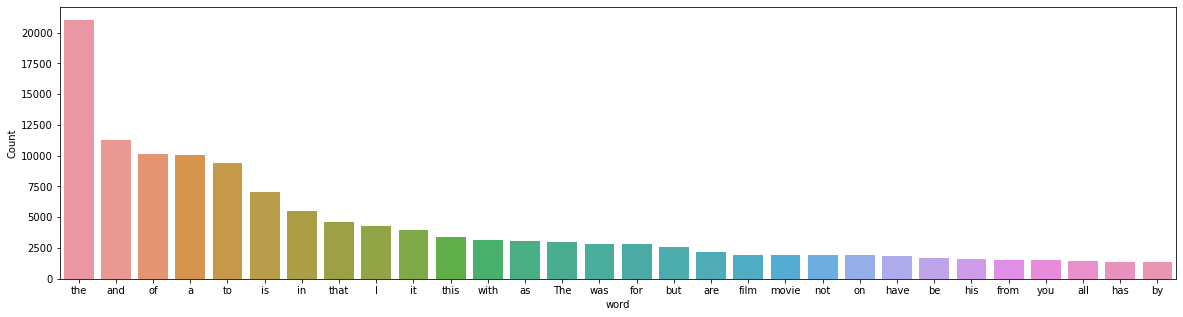

In [110]:
freq_words(LDA_text)

In [111]:
# remove unwanted characters, numbers and symbols
LDA_text = LDA_text.str.replace("[^a-zA-Z#]", " ")

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-111-9b79130df2d0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  LDA_text = LDA_text.str.replace("[^a-zA-Z#]", " ")


In [113]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
LDA_text  = LDA_text .apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in LDA_text ]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


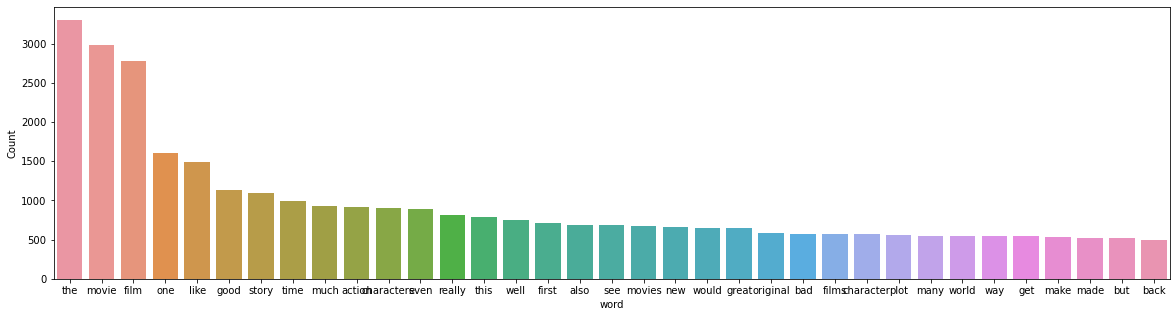

In [117]:
freq_words(reviews, 35)

In [127]:
!python -m spacy download en_core_web_sm

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [128]:
nlp = spacy.load("en_core_web_sm")

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['usually', 'watch', 'movies', 'twice', 'short', 'amount', 'time', 'but', 'double', 'feature', 'midnight', 'premiere', 'infinity', 'war', 'almost', 'weeks', 'ago', 'watched', 'endgame', 'yesterday', 'amazing', 'first', 'impression', 'and', 'spoil', 'anything', 'endgame', 'talk', 'things', 'infinity', 'war', 'seen', 'yet', 'blame', 'anything', 'revealed', 'summary', 'pop', 'culture', 'reference', 'quite', 'marvel', 'movies', 'hinting', 'franchises', 'alien', 'got', 'name', 'checked', 'example', 'infinity', 'war', 'even', 'copied', 'homaged', 'endgame', 'but', 'little', 'digs', 'important', 'nice', 'touches', 'know', 'having', 'understanding', 'mcu', 'whole', 'phase', 'phase', 'way', 'important', 'and', 'someone', 'familiar', 'comics', 'tell', 'knowing', 'movies', 'enough', 'enjoy', 'franchise', 'still', 'google', 'stuff', 'even', 'make', 'conclusions', 'now', 'lot', 'foreword', 'even', 'gotten', 'one', 'word', 'endgame', 'but', 'said', 'spoilers', 'what', 'know', 'trailers', 'beginning'

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['movie', 'short', 'amount', 'time', 'double', 'feature', 'midnight', 'premiere', 'infinity', 'war', 'week', 'endgame', 'yesterday', 'amazing', 'first', 'impression', 'spoil', 'talk', 'thing', 'infinity', 'war', 'summary', 'pop', 'culture', 'reference', 'movie', 'franchise', 'alien', 'name', 'example', 'infinity', 'war', 'homaged', 'endgame', 'little', 'dig', 'important', 'nice', 'touch', 'mcu', 'whole', 'phase', 'phase', 'way', 'important', 'familiar', 'comic_strip', 'movie', 'enough', 'franchise', 'stuff', 'conclusion', 'lot', 'foreword', 'word', 'endgame', 'spoiler', 'trailer', 'thought', 'half', 'hour', 'movie', 'rattle', 'first', 'hour', 'movie', 'slow', 'ramification', 'character', 'close', 'heart', 'wind', 'pun', 'movie', 'answer', 'thing', 'unexplainable', 'full', 'drama', 'lot', 'humor', 'movie', 'beloved', 'character', 'thing', 'weight', 'thing', 'bold', 'choice', 'emotional', 'least', 'scene', 'lot', 'fun', 'cynic', 'time', 'movie', 'pleasure', 'much', 'love', 'character', '

In [139]:
len(reviews_2)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1412

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


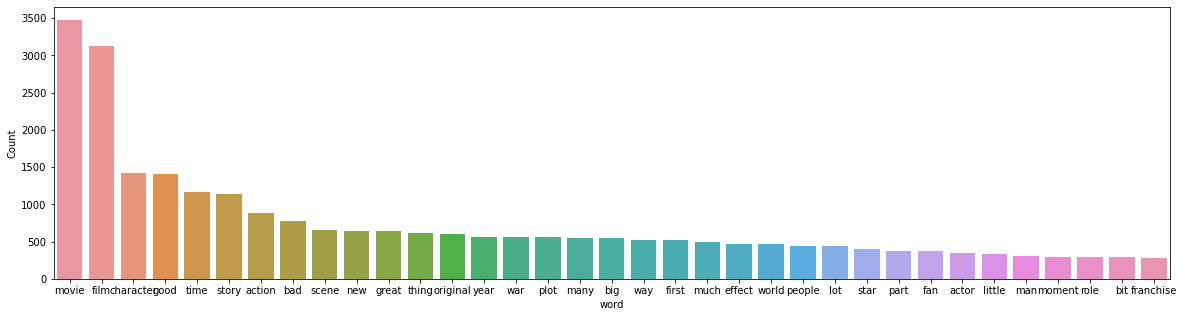

In [131]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

LDA_text = reviews_3

freq_words(LDA_text, 35)

In [132]:
dictionary = corpora.Dictionary(reviews_2)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
LDA = gensim.models.ldamodel.LdaModel

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1412, passes=50, alpha = 'auto', per_word_topics = True)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
lda_model.print_topics()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.024*"new" + 0.022*"film" + 0.022*"star" + 0.018*"character" + 0.017*"war" + 0.012*"first" + 0.012*"good" + 0.011*"force" + 0.010*"original" + 0.010*"beast"'),
 (1,
  '0.039*"movie" + 0.023*"film" + 0.014*"good" + 0.013*"bad" + 0.010*"character" + 0.008*"scene" + 0.008*"time" + 0.007*"actor" + 0.006*"disaster" + 0.006*"story"'),
 (2,
  '0.064*"movie" + 0.015*"film" + 0.014*"good" + 0.012*"bad" + 0.011*"time" + 0.010*"story" + 0.009*"character" + 0.009*"action" + 0.007*"people" + 0.007*"thing"'),
 (3,
  '0.039*"film" + 0.016*"character" + 0.013*"time" + 0.012*"good" + 0.011*"movie" + 0.010*"action" + 0.009*"story" + 0.008*"great" + 0.007*"big" + 0.006*"many"'),
 (4,
  '0.017*"film" + 0.004*"khalar" + 0.004*"zym" + 0.004*"old" + 0.003*"mask" + 0.003*"war" + 0.003*"story" + 0.003*"force" + 0.003*"thing" + 0.002*"problem"'),
 (5,
  '0.027*"film" + 0.014*"story" + 0.010*"original" + 0.009*"character" + 0.008*"good" + 0.008*"movie" + 0.008*"new" + 0.007*"song" + 0.007*"animation" + 

In [142]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.069511 -0.004009       1        1  32.339760
2      0.087799 -0.039705       2        1  29.631509
5      0.054050  0.056087       3        1  14.117419
1      0.057598 -0.044928       4        1  10.189991
0      0.058373  0.076751       5        1   8.224610
6     -0.129481 -0.144853       6        1   4.025982
4     -0.197850  0.100656       7        1   1.470729, topic_info=           Term         Freq        Total Category  logprob  loglift
115       movie  3289.000000  3289.000000  Default  30.0000  30.0000
16         film  2926.000000  2926.000000  Default  29.0000  29.0000
118         new   586.000000   586.000000  Default  28.0000  28.0000
59          war   522.000000   522.000000  Default  27.0000  27.0000
203        star   356.000000   356.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1136        box     2.649758    63.148791   Topic7  -6.4494   1.0484
295       young     2.794836   181.309447   Topic7  -6.3961   0.0470
326   different     2.772941   174.444758   Topic7  -6.4040   0.0777
212        year     2.783168   530.098935   Topic7  -6.4003  -1.0301
19         good     2.803242  1320.350898   Topic7  -6.3931  -1.9355

[505 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6871      4  0.968955          aag
3370      5  0.948879       abrams
8952      1  0.177070      acheron
8952      7  0.708280      acheron
1891      3  0.926947  achievement
...     ...       ...          ...
3263      2  0.951933         zone
3263      5  0.021635         zone
3263      7  0.021635         zone
8960      1  0.755994          zym
8960      7  0.240544          zym

[1086 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 6, 2, 1, 7, 5])